In [1]:
import paramiko
import getpass

host = "158.251.88.197"
port = 22
username = "iaraya"
password = getpass.getpass()

ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect(host, port, username, password)

 ······


## Solving instances

In [2]:
from bsg import load_BRinstance
import numpy as np

L,W,H,boxes,id2box = load_BRinstance(filename="BR8.txt",inst=4, nbox=1)
_boxes=boxes.copy()

#Dimension del contenedor
L = int(L/2)
W = int(W/2)
H = int(H/2)

In [15]:
from mclp import generate_candidate_solution
r_param = 1.5 
total_test = 100

#Creacion de solucion candidata
init_solution = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)

{"remaining" :[[17,4],[26,2],[14,3]], "loaded" :[[12,2],[16,4],[17,4],[4,8]], "utilization" : 0.84837643}

{"remaining" :[[19,3],[20,1],[29,8]], "loaded" :[[15,3],[19,1],[26,2],[25,3],[13,3],[20,5]], "utilization" : 0.88732761}

{"remaining" :[[9,1],[28,4],[6,1]], "loaded" :[[9,1],[28,2],[20,1],[6,3]], "utilization" : 0.67517332}

{"remaining" :[[19,3],[6,1],[8,6],[10,2],[27,1]], "loaded" :[[21,5],[5,2],[10,4],[27,3]], "utilization" : 0.91619395}

{"remaining" :[[6,1],[28,4],[23,1]], "loaded" :[[18,6],[8,6],[22,5],[23,4]], "utilization" : 0.87217039}

{"remaining" :[[2,1],[28,3],[27,1],[6,1]], "loaded" :[[2,5],[3,3],[24,3],[1,4],[28,1],[10,2]], "utilization" : 0.89309195}

{"remaining" :[[28,3],[19,3],[29,1],[14,1]], "loaded" :[[11,8],[6,1],[29,7],[14,2]], "utilization" : 0.8460042}

{"remaining" :[[28,3],[19,1],[14,1],[30,1]], "loaded" :[[19,2],[11,1],[27,1],[23,1],[2,1],[30,7],[7,7]], "utilization" : 0.86115233}

{"remaining" :[[28,2],[17,2]], "loaded" :[[30,1],[28,1],[17,2],[14,1],[

In [50]:
from mclp import get_media_volumen
for bin in init_solution:
    print(bin.id, ":", bin, bin.utilization)
get_media_volumen(init_solution)

1 : [12, 2], [16, 4], [17, 4], [4, 8],  0.84837643
2 : [15, 3], [19, 1], [26, 2], [25, 3], [13, 3], [20, 5],  0.88732761
3 : [9, 1], [28, 2], [20, 1], [6, 3],  0.67517332
4 : [21, 5], [5, 2], [10, 4], [27, 3],  0.91619395
5 : [18, 6], [8, 6], [22, 5], [23, 4],  0.87217039
6 : [2, 5], [3, 3], [24, 3], [1, 4], [28, 1], [10, 2],  0.89309195
7 : [11, 8], [6, 1], [29, 7], [14, 2],  0.8460042
8 : [19, 2], [11, 1], [27, 1], [23, 1], [2, 1], [30, 7], [7, 7],  0.86115233
9 : [30, 1], [28, 1], [17, 2], [14, 1], [9, 1], [19, 1], [29, 2],  0.71400601
10 : [28, 2], [17, 2],  0.47637027


0.7989866476938385

In [5]:
i=6
print(id2box[i].l,id2box[i].w,id2box[i].h)
print(id2box[i].rotx,id2box[i].roty,id2box[i].rotz)

119 59 39
0 1 1


In [ ]:
import copy as cp 
from mclp import random_swap
from mclp import verify_solution

best_solution = cp.deepcopy(init_solution)
media = get_media_volumen(init_solution)

for i in range(1000):
    solution = cp.deepcopy(best_solution)
    solution, diff_var = random_swap(solution = solution, media_volumen = media, verbose=False)

    if solution is not None and diff_var>0:
        verified_solution=True
        if not verify_solution(ssh, solution, id2box, bsg_time=2):
            print(i,"verification fails")
            verified_solution=False

        if verified_solution:
            for bin in solution:
                print(bin.id, ":", bin, bin.utilization, bin.verify, bin.p)
            best_solution = cp.deepcopy(solution)

    

{"remaining" :[[29,1],[23,1]], "loaded" :[[3,3],[1,4],[17,2],[28,1]], "utilization" : 0.71307387}

22 verification fails
{"remaining" :[[6,1]], "loaded" :[[26,2],[29,3],[21,3],[6,2],[19,1]], "utilization" : 0.76547204}

25 verification fails
{"remaining" :[[5,1]], "loaded" :[[26,2],[29,2],[21,2],[6,4],[9,1]], "utilization" : 0.75077033}

28 verification fails


### Estimation of adjusted volumes

In [17]:
from mclp import generate_candidate_solution
r_param = 1.5 
total_test = 100

boxes=_boxes.copy()
#Creacion de solucion candidata
bins1 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)
boxes=_boxes.copy()
bins2 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)
boxes=_boxes.copy()
bins3 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)
boxes=_boxes.copy()
bins4 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)
boxes=_boxes.copy()
bins5 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)

Initial Solution: 10
Initial Solution: 10
Initial Solution: 10
Initial Solution: 10
Initial Solution: 10


In [41]:
from sklearn.linear_model import LinearRegression
bins=[*bins1[:-2],*bins2[:-2],*bins3[:-2],*bins4[:-2],*bins5[:-2]]
X = []; y=[]
for bin in bins:
    x = np.zeros(len(_boxes))
    i=0
    for box in _boxes:
        if box in bin.boxes:
            x[i]=bin.boxes[box]
        i+=1
    X.append(x)
    y.append(1.0)

reg = LinearRegression(fit_intercept=False).fit(X, y)
reg.coef_

array([ 9.57547722e-02, -2.38411283e-04,  9.00518903e-03,  2.22239154e-02,
        1.49428323e-01,  9.21527916e-02,  3.57025259e-02, -1.23665442e-02,
        3.42634762e-02,  8.29307381e-02,  3.02056226e-02,  1.61588516e-01,
        1.05730012e-01,  1.22543496e-01,  2.34327383e-02, -3.83339342e-03,
        7.32290200e-02,  2.63558051e-02,  9.80034337e-02,  6.38454996e-02,
        8.86195880e-02,  8.40517687e-02,  6.86853234e-02,  5.62478476e-02,
        4.87644869e-02,  1.16165472e-01,  6.40687979e-02,  2.97148566e-01,
        7.05680527e-02,  3.00825444e-02])

In [42]:
vols=[box.vol/(L*W*H) for box in _boxes]

(-0.02784229967179231, 0.3126243216680343)

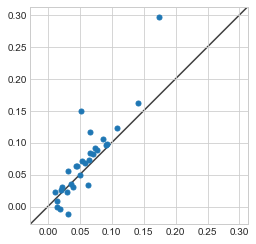

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(vols, reg.coef_, s=25,cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
